In [23]:
import pandas as pd
url = 'https://raw.githubusercontent.com/CristianBerns/Ciencia_de_Datos_I/refs/heads/main/exportaciones%20de%20frutas.csv'
df = pd.read_csv(url, index_col=0)
df



,pais_origen,producto,paisdestino_id,pais_destino,año,unimed_cod,unidad_medida,totales_tn,moneda_cod,moneda,totales_usd
paisorigen_id,,,,,,,,,,,
32,Argentina,Arandano,212.0,Estados Unidos,2013,tn,Toneladas,7352,USD,Dolares,49637.14
32,Argentina,Arandano,426.0,Reino Unido,2013,tn,Toneladas,2080,USD,Dolares,15151.50
32,Argentina,Arandano,423.0,Países Bajos,2013,tn,Toneladas,1091,USD,Dolares,8001.87
32,Argentina,Arandano,438.0,Alemania,2013,tn,Toneladas,614,USD,Dolares,5041.24
32,Argentina,Arandano,204.0,Canadá,2013,tn,Toneladas,577,USD,Dolares,4875.80
...,...,...,...,...,...,...,...,...,...,...,...
32,Argentina,Uva,444.0,Rusia,2017,tn,Toneladas,1280,USD,Dolares,1966.38
32,Argentina,Uva,438.0,Alemania,2017,tn,Toneladas,377,USD,Dolares,460.05
32,Argentina,Uva,202.0,Bolivia,2017,tn,Toneladas,365,USD,Dolares,186.04


In [24]:
#Ahora reemplazaremos los valores NaN por un valor de Id (que no esté repetido)
df_limpio= df.fillna(520)
df_limpio



,pais_origen,producto,paisdestino_id,pais_destino,año,unimed_cod,unidad_medida,totales_tn,moneda_cod,moneda,totales_usd
paisorigen_id,,,,,,,,,,,
32,Argentina,Arandano,212.0,Estados Unidos,2013,tn,Toneladas,7352,USD,Dolares,49637.14
32,Argentina,Arandano,426.0,Reino Unido,2013,tn,Toneladas,2080,USD,Dolares,15151.50
32,Argentina,Arandano,423.0,Países Bajos,2013,tn,Toneladas,1091,USD,Dolares,8001.87
32,Argentina,Arandano,438.0,Alemania,2013,tn,Toneladas,614,USD,Dolares,5041.24
32,Argentina,Arandano,204.0,Canadá,2013,tn,Toneladas,577,USD,Dolares,4875.80
...,...,...,...,...,...,...,...,...,...,...,...
32,Argentina,Uva,444.0,Rusia,2017,tn,Toneladas,1280,USD,Dolares,1966.38
32,Argentina,Uva,438.0,Alemania,2017,tn,Toneladas,377,USD,Dolares,460.05
32,Argentina,Uva,202.0,Bolivia,2017,tn,Toneladas,365,USD,Dolares,186.04


In [25]:
#Finalmente, convertimos la columna paisdestino_id de Flotante a Número Entero
df_limpio['paisdestino_id'] = df_limpio['paisdestino_id'].astype(int)
df_final= df_limpio
df_final

,pais_origen,producto,paisdestino_id,pais_destino,año,unimed_cod,unidad_medida,totales_tn,moneda_cod,moneda,totales_usd
paisorigen_id,,,,,,,,,,,
32,Argentina,Arandano,212,Estados Unidos,2013,tn,Toneladas,7352,USD,Dolares,49637.14
32,Argentina,Arandano,426,Reino Unido,2013,tn,Toneladas,2080,USD,Dolares,15151.50
32,Argentina,Arandano,423,Países Bajos,2013,tn,Toneladas,1091,USD,Dolares,8001.87
32,Argentina,Arandano,438,Alemania,2013,tn,Toneladas,614,USD,Dolares,5041.24
32,Argentina,Arandano,204,Canadá,2013,tn,Toneladas,577,USD,Dolares,4875.80
...,...,...,...,...,...,...,...,...,...,...,...
32,Argentina,Uva,444,Rusia,2017,tn,Toneladas,1280,USD,Dolares,1966.38
32,Argentina,Uva,438,Alemania,2017,tn,Toneladas,377,USD,Dolares,460.05
32,Argentina,Uva,202,Bolivia,2017,tn,Toneladas,365,USD,Dolares,186.04


DUDA 1: ACÁ NO COINCIDEN LOS VALORES DEL DATA FRAME, CON LOS QUE SE MUESTRAN EN EL GRÁFICO

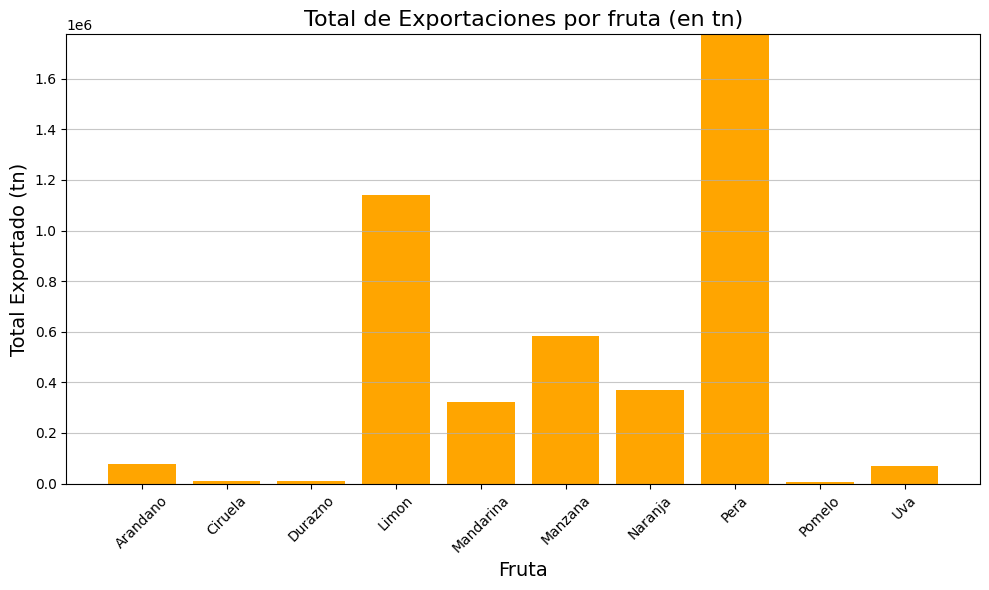

In [33]:
# Ver los datos antes de graficar

import matplotlib.pyplot as plt
import seaborn as sns

producto_totales = df.groupby('producto')['totales_tn'].sum().reset_index()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(producto_totales['producto'], producto_totales['totales_tn'], color='orange')

# Personalización del gráfico
plt.title("Total de Exportaciones por fruta (en tn)", fontsize=16)
plt.xlabel("Fruta", fontsize=14)
plt.ylabel("Total Exportado (tn)", fontsize=14)
plt.xticks(rotation=45) # Inclinación del texto para mayor claridad en la visualización
plt.ylim(0, producto_totales['totales_tn'].max() + 1000)  # Ajustar el límite del eje Y
plt.grid(axis='y', linestyle='-', alpha=0.7)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


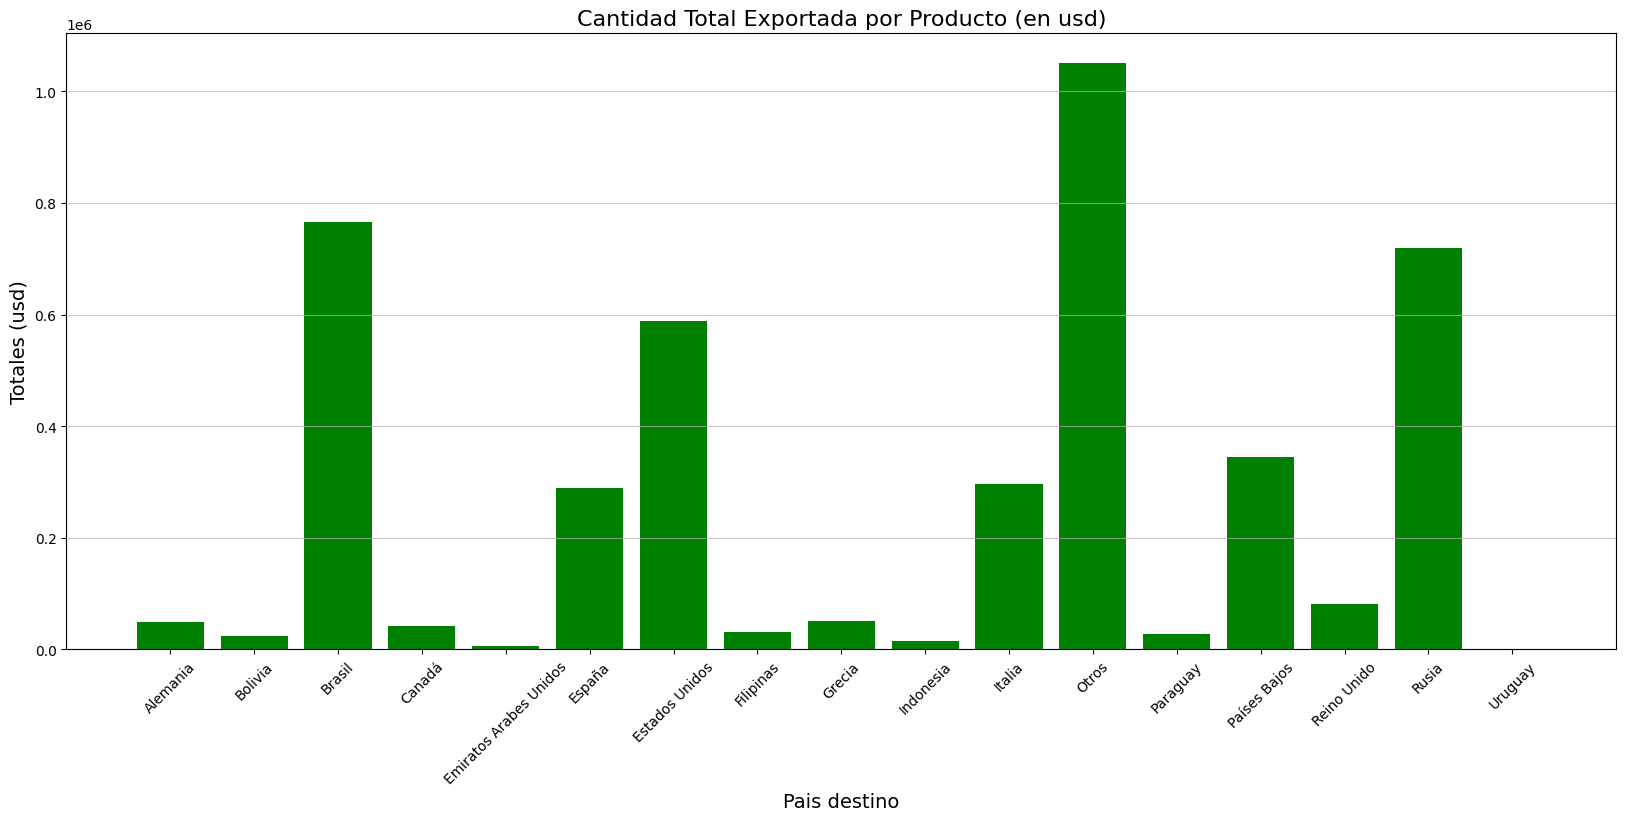

In [34]:
dolares_totales = df_final.groupby('pais_destino')['totales_usd'].sum().reset_index()

# Crear el gráfico de barras
plt.figure(figsize=(20, 8))  # Tamaño del gráfico
plt.bar(dolares_totales['pais_destino'], dolares_totales['totales_usd'], color='green')

#Personalización del gráfico
plt.title("Cantidad Total Exportada por Producto (en usd)", fontsize=16)
plt.xlabel("Pais destino", fontsize=14)
plt.ylabel("Totales (usd)", fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='-', alpha=0.7)
plt.show()


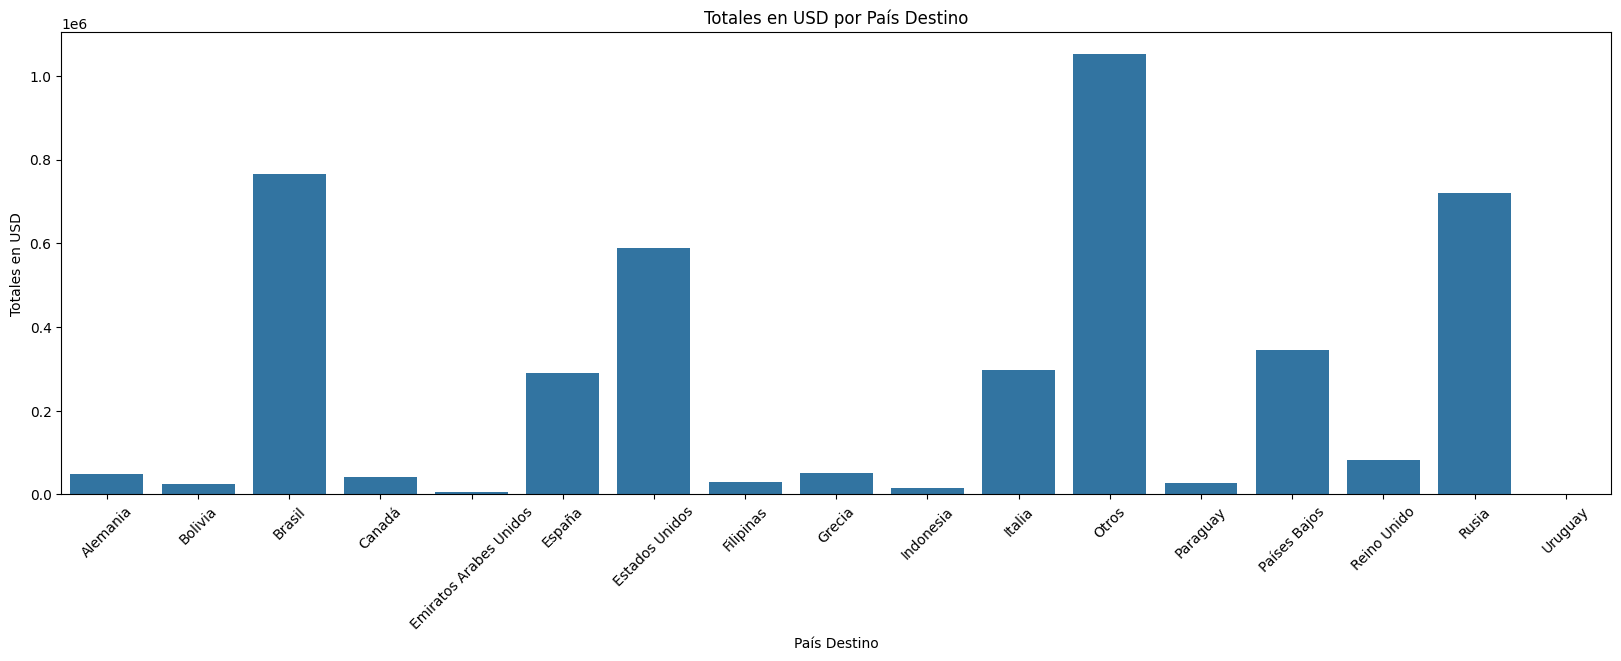

In [42]:
# Agrupar los datos por pais_destino y sumar los totales_usd
data_agrupada = df_final.groupby("pais_destino")["totales_usd"].sum().reset_index()

# Crear el gráfico de barras
plt.figure(figsize=(20, 6))
sns.barplot(data=data_agrupada, x="pais_destino", y="totales_usd")
plt.xticks(rotation=45)
plt.title("Totales en USD por País Destino")
plt.xlabel("País Destino")
plt.ylabel("Totales en USD")
plt.show()


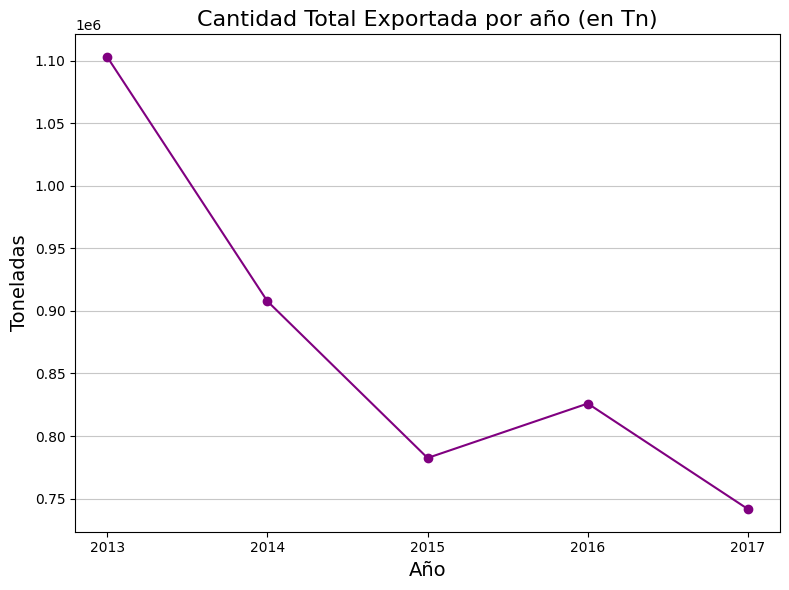

In [37]:
import matplotlib.pyplot as plt

# Crear el gráfico de líneas
plt.figure(figsize=(8, 6))  # Tamaño del gráfico
plt.plot(importaciones_por_año['año'], importaciones_por_año['totales_tn'], marker='o', color='purple', linestyle='-')

# Personalización de la gráfica
plt.title("Cantidad Total Exportada por año (en Tn)", fontsize=16)
plt.xlabel("Año", fontsize=14)
plt.ylabel("Toneladas", fontsize=14)
plt.grid(axis='y', linestyle='-', alpha=0.7)
plt.xticks(importaciones_por_año['año'])  # Asegurar que todos los años se muestren como etiquetas
plt.tight_layout()  # Ajustar la distribución para evitar solapamientos
plt.show()


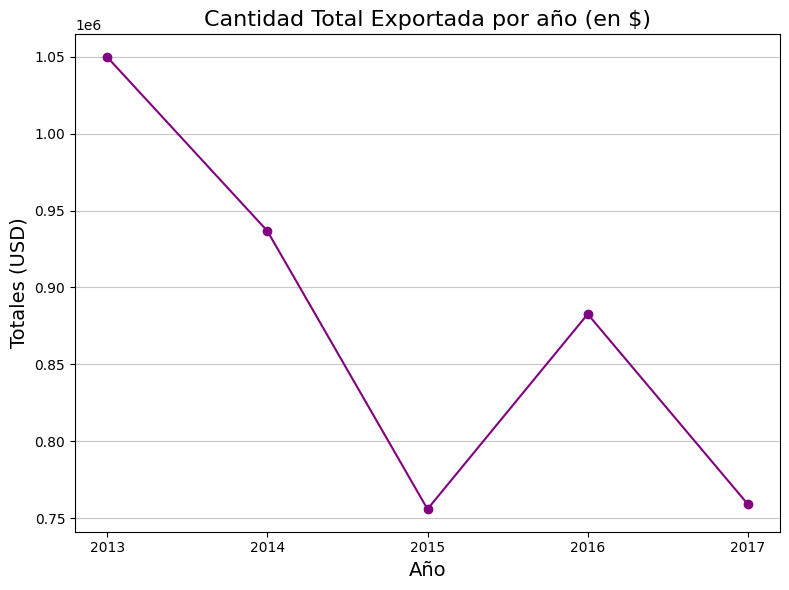

In [39]:

# Crear el gráfico de líneas
plt.figure(figsize=(8, 6))  # Tamaño del gráfico
plt.plot(importaciones_por_año['año'], importaciones_por_año['totales_usd'], marker='o', color='purple', linestyle='-')

# Personalización de la gráfica
plt.title("Cantidad Total Exportada por año (en $)", fontsize=16)
plt.xlabel("Año", fontsize=14)
plt.ylabel("Totales (USD)", fontsize=14)
plt.grid(axis='y', linestyle='-', alpha=0.7)
plt.xticks(importaciones_por_año['año'])  # Mostrar todos los años en el eje X
plt.tight_layout()  # Ajustar la distribución para evitar solapamientos
plt.show()


In [45]:
df_final

,pais_origen,producto,paisdestino_id,pais_destino,año,unimed_cod,unidad_medida,totales_tn,moneda_cod,moneda,totales_usd
paisorigen_id,,,,,,,,,,,
32,Argentina,Arandano,212,Estados Unidos,2013,tn,Toneladas,7352,USD,Dolares,49637.14
32,Argentina,Arandano,426,Reino Unido,2013,tn,Toneladas,2080,USD,Dolares,15151.50
32,Argentina,Arandano,423,Países Bajos,2013,tn,Toneladas,1091,USD,Dolares,8001.87
32,Argentina,Arandano,438,Alemania,2013,tn,Toneladas,614,USD,Dolares,5041.24
32,Argentina,Arandano,204,Canadá,2013,tn,Toneladas,577,USD,Dolares,4875.80
...,...,...,...,...,...,...,...,...,...,...,...
32,Argentina,Uva,444,Rusia,2017,tn,Toneladas,1280,USD,Dolares,1966.38
32,Argentina,Uva,438,Alemania,2017,tn,Toneladas,377,USD,Dolares,460.05
32,Argentina,Uva,202,Bolivia,2017,tn,Toneladas,365,USD,Dolares,186.04


DUDA 2: DEBERÍA ELIMINAR LOS DATOS DÓNDE EL PAÍS ES OTROS? SÉ QUE PIERDO INFORMACIÓN, PERO PARA ESTE CASO DE ESTUDIO ES MEJOR TENER NOMBRES CONCRETOS DE PAÍSES PARA LAS PREGUNTAS DE NEGOCIO QUE PUEDAN SURGIR

In [46]:
# Eliminar filas donde paisdestino_id es 520 ("Otros") a través de un filtro
df_por_pais = df_final[df_final["pais_destino"] != 'Otros']
df_por_pais



,pais_origen,producto,paisdestino_id,pais_destino,año,unimed_cod,unidad_medida,totales_tn,moneda_cod,moneda,totales_usd
paisorigen_id,,,,,,,,,,,
32,Argentina,Arandano,212,Estados Unidos,2013,tn,Toneladas,7352,USD,Dolares,49637.14
32,Argentina,Arandano,426,Reino Unido,2013,tn,Toneladas,2080,USD,Dolares,15151.50
32,Argentina,Arandano,423,Países Bajos,2013,tn,Toneladas,1091,USD,Dolares,8001.87
32,Argentina,Arandano,438,Alemania,2013,tn,Toneladas,614,USD,Dolares,5041.24
32,Argentina,Arandano,204,Canadá,2013,tn,Toneladas,577,USD,Dolares,4875.80
...,...,...,...,...,...,...,...,...,...,...,...
32,Argentina,Uva,203,Brasil,2017,tn,Toneladas,2148,USD,Dolares,3399.13
32,Argentina,Uva,444,Rusia,2017,tn,Toneladas,1280,USD,Dolares,1966.38
32,Argentina,Uva,438,Alemania,2017,tn,Toneladas,377,USD,Dolares,460.05
